<h1 style="text-align:center">Tutorial: Fruit Internal Structure Analysis Using Stamps</h1>

<p style="color:#696969; text-align:center"><em>Last update: July 11, 2025</em></p>

<p style="color:#696969; text-align:center">
  <strong>Written by:</strong> M. Alejandra Torres-Meraz<br>
  <strong>Reviewed by:</strong> Hector Lopez-Moreno, Sydney Berkeley, Drew Cole
</p>


<p style="text-align:center">
  <a href="https://github.com/mariameraz" target="_blank" style="text-decoration:none; color:#48D1CC;">
    <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/github/github-original.svg" 
         alt="GitHub" width="20" style="vertical-align:middle; margin-right:5px;">
    View on GitHub
  </a>
</p>



> <font style='color:#BC8F8F'> **NOTE**:</font> \
> \
> _Before starting the tutorial, make sure you have created the MorphoSlicer conda environment and installed the MorphoSlicer package, as described in the [XXX document].
For more information on the functions used in this tutorial — including optional arguments and advanced features — please refer to the MorphoSlicer manual._
> \
> <br>

<br>

---

<br>

The `internal_structure` module in MorphoSlicer supports both single-image and batch analysis:

<br>

#### **<font style="color: #A47864">1. Processing individual images</font>**



 **<font style='color: #6495ED'>1.1 Importing the</font>** `AnalyzingImage`

<br>

The `AnalyzingImage` class from the `internal_structure` module of the `morphoslicer` package provides all required methods for image analysis and processing. Initialize it with `AnalyzingImage(file_path: str)`. 

**To use it**:  
1. Provide an image/pdf path (e.g., `"/data/sample.png"`, `"/data/sample.pdf"`)  
2. For PDFs:  
   - First convert pages to images using `pdf_to_img()`  



In [1]:
from morphoslicer.internal_structure import AnalyzingImage

In [2]:
# Path to your image or PDF file (replace with your actual file path).
# In this example, we’ll start by converting a PDF to images, so we need to provide the path to our PDF file.
path_pdf =  '/Users/alejandra/Documents/GitHub/CranberryLab/Internal_Structure/PDF/STAMPS_00.PDF'

# Initialize image analyzer (you can rename the variable name as needed, eg., 'locule_analyzer', 'image_analysis', etc.)
stamp_analysis = AnalyzingImage(path_pdf) 

In [5]:
# Run `pdf_to_img()` function to extract all the pages of your pdf as images. 
# If no output_dir is indicated, the function will create a new folder called `images_from_pdf` in the input folder. 
# By default, images will saved as .jpg with 300 dpi (this can be changed using the dpi argument)

stamp_analysis.pdf_to_img(path_pdf, dpi = 600)

╔══════════════════════════════════════╗
║  Extracting images may take a few minutes... ⋆✧｡٩(ˊᗜˋ )و✧*｡      ║
╚══════════════════════════════════════╝
Converted 13 pages to images.
Saved in: /Users/alejandra/Documents/GitHub/CranberryLab/Internal_Structure/PDF/images_from_pdf


<br>

**<font style='color:#6495ED'>1.2 Load our image</font>**

<br>

The first step of our analysis is to load the image to be processed using the `read_image(image_path: str)` function.

In the previous step, we converted a PDF to images, so we initialized the analyzer with the path to the PDF file. `AnalyzingImage()` stores this input path in the variable `stamp_analysis` to be used in later functions. We can access the path as follows:

In [3]:
print(stamp_analysis.image_path)

/Users/alejandra/Documents/GitHub/CranberryLab/Internal_Structure/PDF/STAMPS_00.PDF


For this reason, in this particular case, we need to manually replace the PDF path with the path to the specific image when using `read_image()`. However, if `AnalyzingImage()` is initialized directly with the path to an image, **<font style='color:#A52A2A'>skip this step</font>** — `read_image()` will automatically use the path stored in the `stamp_analysis.image_path` variable.

By default, the `read_image` function only prints a success message if the image was loaded correctly (this message can be omitted by setting `output_message = False`).
If we want to visualize the image during loading, we can use the `plot` argument.
The loaded image can also be accessed at any time via `stamp_analysis.img`.


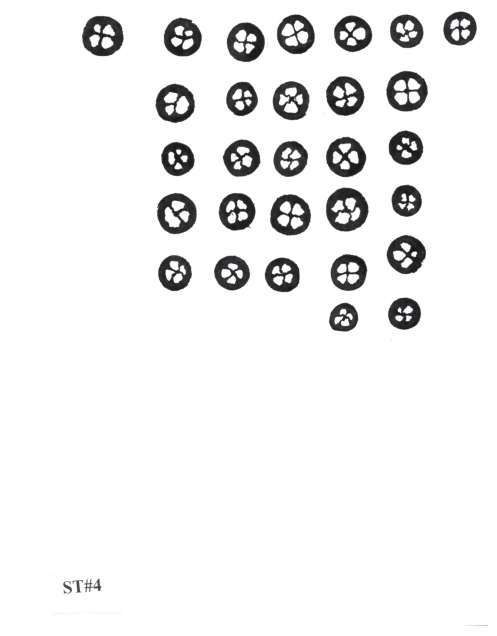

STAMPS_01_page2.jpg successfully loaded ♡


In [4]:
# Replace the PDF path with the image file path in the variable stamp_analysis.image_path
path_image = '/Users/alejandra/Documents/GitHub/CranberryLab/Internal_Structure/' \
'PDF/images_from_pdf/STAMPS_01_page2.jpg'

stamp_analysis.image_path = path_image 

# Read the image (by default, plot = False)
stamp_analysis.read_image(plot=True, plot_size=(8, 8))

> <font style='color:#BC8F8F'> **NOTE**:</font> \
> \
> As with all other functions in this module, this message can be omitted by setting `output_message = False`.
> \
> <br>

<br>

**<font style='color:#6495ED'>1.2 Create a mask</font>**

<br>

The next step is to create a mask to segment the fruits and the label in the image using the `create_mask()` function. MorphoSlicer assumes that the background in the images is black; however, in the case of fruit stamps, the background is white due to the paper color. In these cases, we need to add the argument `stamp = True`, which tells `create_mask` to invert the image colors before generating the mask. The inverted image will be stored in the `stamp_analysis.inverted_image` argument.

Again, by using the argument `plot = True`, we can visualize the generated mask.



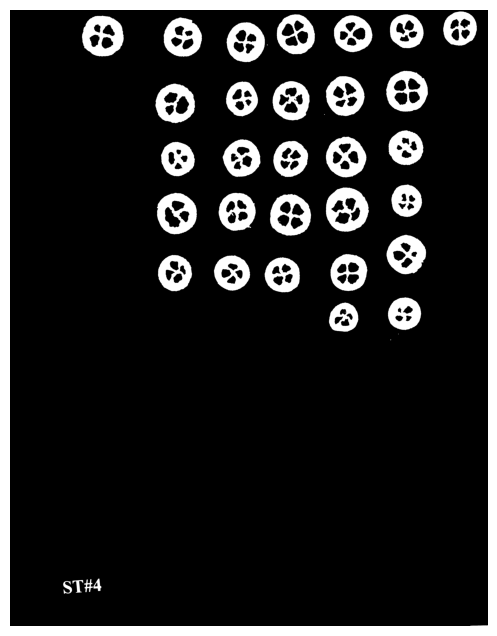

In [5]:
stamp_analysis.create_mask(n_kernel=5, stamp = True, plot=True, plot_size = (8,8))

> <font style='color:#BC8F8F'> **NOTE**:</font> \
> \
> In fruit stamp images, large kernels can close thin gaps between locules,
causing them to merge, which may lead to inaccurate detection. Preferably, use a kernel size of 5 or smaller to keep locules separated.\
> <br>
> _For more details on how `n_kernel` affects the mask, please refer to the manual._
> \
> 

***<font style='color:#9370DB'>Optional step:</font>*** To better understand what we mean by "inverted image", let’s take a look at the original image, the inverted version, and the resulting mask again.

For image visualization, we’ll use the `matplotlib` package.

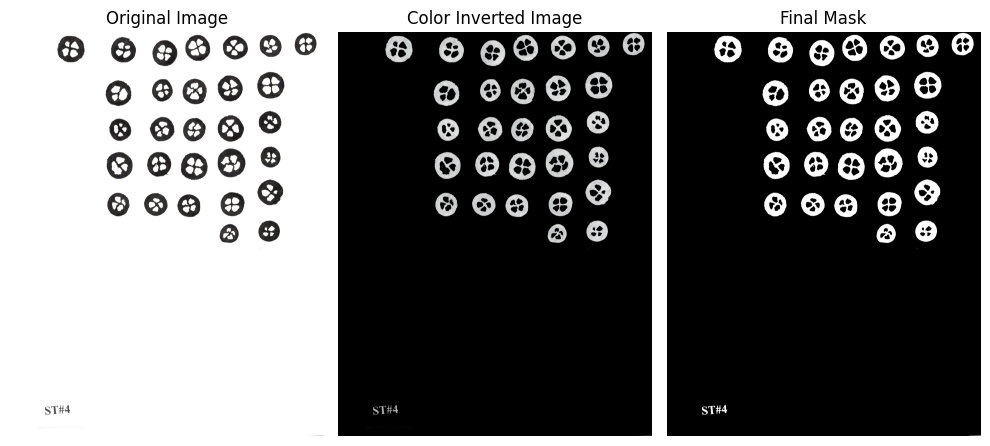

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))

plt.subplot(1,3,1)
plt.imshow(stamp_analysis.img)
plt.axis('off')
plt.title('Original Image')

plt.subplot(1,3,2)
plt.imshow(stamp_analysis.img_inverted)
plt.axis('off')
plt.title('Color Inverted Image')

plt.subplot(1,3,3)
plt.imshow(stamp_analysis.mask, cmap = 'gray')
plt.axis('off')
plt.title('Final Mask')

plt.tight_layout()
plt.show()

Inverting the colors of the original image allows the `create_mask()` function to detect all regions where the pixel values differ from black, using that information to build the binary mask.

Although the inverted image may look visually similar to the mask, they are not the same — the mask is a binary image specifically designed to highlight relevant objects and exclude the background.

Everything selected by the mask is shown in white, meaning those areas correspond to the detected objects (such as fruits and labels), while the background remains black.



<br>

**<font style='color:#6495ED'>1.3 Fruit Detection</font>**

<br>

After finalizing the mask, proceed with fruit segmentation using `find_fruits()`. This function automatically filters detected contours by size and shape parameters - for typical stamp analysis, we recommend enforcing circularity > 0.5 to exclude crossed-out stamps. The remaining contours will be classified as valid fruits.

In [6]:
stamp_analysis.find_fruits(min_circularity = 0.5)

Total detected objects: 156
Detected fruits after filtering:  29 


At the end of the counting process, the `find_fruits()` function returns a message indicating the total number of objects detected and the number of objects classified as fruits.

The coordinates of all detected contours are stored in the output variable `stamps_analysis.contours`, while the IDs of the contours corresponding to fruits and their associated locules are stored in the output variable `stamps_analysis.fruit_locus_map`.

<br>

**<font style='color:#6495ED'>1.4 Detect image metadata</font>**

<br>

Finally, using the obtained mask and the detected contours, we will extract morphological traits from each fruit using the `analyze_image()` function.

As output, this function generates an annotated image displaying the ID of each fruit and its number of locules, as well as a table (CSV) with the measurements for each individual fruit. These outputs are stored in `stamp_analysis.results`, specifically in `results.rgb_image` (annotated image) and `results.table` (data table). The contour of each fruit is highlighted in ***green***, and its corresponding locule contours are shown in ***pink***. The centroid of each fruit is marked with a ***blue dot***, while the major and minor axes are represented by ***red and blue lines***, respectively. The ***yellow*** contour outlines the inner pericarp from the outer pericarp. Finally, a ***blue bounding box*** is fitted and drawn around each fruit. For more details on the traits shown in the table and the annotated image, refer to the corresponding section in this manual.

By default, for scaling purposes (i.e., converting from pixels to centimeters), the function assumes that the paper sheet used was US Letter size (ANSI A). However, this can be manually adjusted using the `size_scale()` function if a different reference size was used. Available options for this argument and usage examples can be found in the manual.

Additionally, in the title of the annotated image, the function displays the name of the original image followed by the detected label text.

If no label card is found in the image, the title will instead show `No label included/detected`. Note that text detection may not always be accurate, depending on the font type and size used. For recommendations on how to create an optimal label card, refer to the appropriate section in this manual.



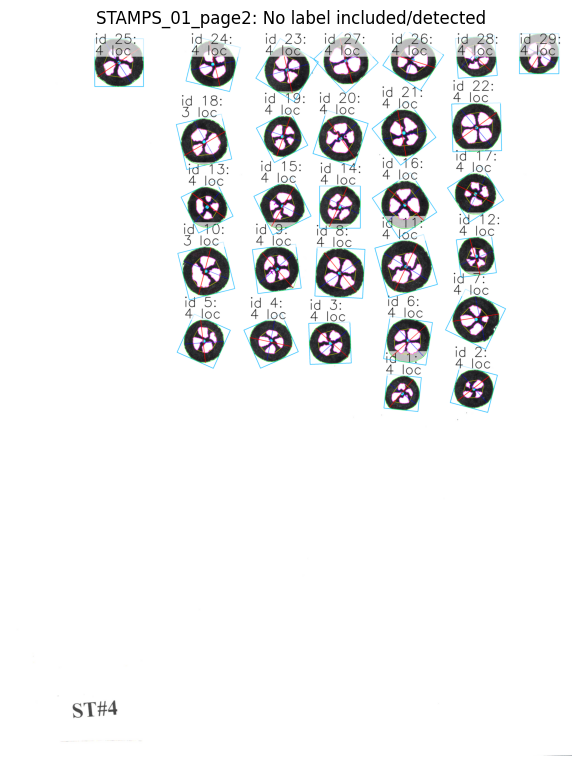

In [7]:
# Paso 6: análisis final
stamp_analysis.analyze_image(plot=True, 
                             font_scale = 4, 
                             font_thickness = 3, 
                             plot_size = (8,8), 
                             contour_mode = 'hull');


> <font style='color:#BC8F8F'> **NOTE**:</font> \
> \
>  For stamp-based analysis, we recommend using the argument contour_mode = "hull" when extracting fruit contours. This approach helps reduce errors caused by irregularities or imperfections in the stamping process.\
> <br>
> _For more details on how `contours_mode` affects the contours, please refer to the manual._
> \


A summary of all stored variables can be printed using the metadata_summary() function. Each variable can also be accessed individually as needed.

In [8]:
# Look a summary of all the variables generated during the image analysis.
stamp_analysis.metadata_summary()

Image: STAMPS_01_page2
Label detected: No label included/detected
Contours detected: 156
Fruits detected: 29
Image size: 27.85 cm x 21.80 cm


In [9]:
# Or check them individually
print(stamp_analysis.img_name) # Image name
print(stamp_analysis.label_text) # Label text
print(f'Contours detected: {len(stamp_analysis.contours)}') 
print(f'Fruits detected: {len(stamp_analysis.fruit_locus_map)}')
print(f'Image size: {stamp_analysis.w_cm} x {stamp_analysis.h_cm}')

STAMPS_01_page2
No label included/detected
Contours detected: 156
Fruits detected: 29
Image size: 27.85 x 21.8


To access the results table, we can use the `pandas` library to load the CSV file into a DataFrame for easier manipulation and analysis:



In [10]:
import pandas as pd 

df_results = pd.DataFrame(stamp_analysis.results.table)

df_results

,image_name,label,fruit_id,n_locules,major_axis_cm,minor_axis_cm,fruit_area_cm2,inner_pericarp_area_cm2,outer_pericarp_area_cm2,fruit_perimeter_cm,...,fruit_aspect_ratio,fruit_solidity,locules_density,inner_area_ratio,locule_area_ratio,fruit_compactness,mean_locule_circularity,std_locule_circularity,box_height_cm,box_width_cm
0,STAMPS_01_page2,No label included/detected,1,4,1.379209,1.248999,1.385714,0.457578,0.928136,4.082133,...,1.104252,1.0,2.886598,0.330211,1.958289,0.956953,0.681724,0.039572,1.282489,1.280653
1,STAMPS_01_page2,No label included/detected,2,4,1.501393,1.451833,1.757655,0.440229,1.317426,4.570830,...,1.034136,1.0,2.275760,0.250464,3.790047,0.945903,0.734177,0.053154,1.446998,1.439393
2,STAMPS_01_page2,No label included/detected,3,4,1.617992,1.544542,2.027998,0.714262,1.313736,4.916151,...,1.047555,1.0,1.972389,0.352200,1.458026,0.948360,0.739714,0.063410,1.544091,1.539991
3,STAMPS_01_page2,No label included/detected,4,4,1.607183,1.555816,2.025074,0.645284,1.379790,4.907639,...,1.033016,1.0,1.975236,0.318647,1.533061,0.946443,0.787169,0.025625,1.554894,1.540064
4,STAMPS_01_page2,No label included/detected,5,4,1.610505,1.492336,1.981958,0.682246,1.299712,4.859798,...,1.079184,1.0,2.018206,0.344228,1.863917,0.948270,0.724156,0.080219,1.565117,1.483715
5,STAMPS_01_page2,No label included/detected,6,4,1.701274,1.646116,2.237386,0.850061,1.387325,5.163280,...,1.033508,1.0,1.787801,0.379935,1.480246,0.948201,0.806468,0.031961,1.616206,1.604263
6,STAMPS_01_page2,No label included/detected,7,4,1.749205,1.728842,2.443227,0.811412,1.631815,5.395765,...,1.011778,1.0,1.637179,0.332107,4.229519,0.948271,0.775967,0.037314,1.698822,1.673359
7,STAMPS_01_page2,No label included/detected,8,4,1.902317,1.871313,2.814382,1.162418,1.651964,5.797454,...,1.016568,1.0,1.421271,0.413028,1.053251,0.950346,0.801208,0.027108,1.834056,1.791244
8,STAMPS_01_page2,No label included/detected,9,4,1.762555,1.679391,2.328775,0.825369,1.503406,5.296098,...,1.049521,1.0,1.717641,0.354422,1.120343,0.958461,0.683945,0.096159,1.660790,1.634917
9,STAMPS_01_page2,No label included/detected,10,3,1.829911,1.803591,2.688810,1.024078,1.664732,5.656741,...,1.014593,1.0,1.115735,0.380867,2.480425,0.947028,0.697491,0.082360,1.800974,1.754637


<br>

**<font style='color:#6495ED'>1.5 Export results</font>**

<br>

If you want to quickly and easily export the annotated image and results table, you can use the functions available within `stamp_analysis.results`. There are three different functions to save your outputs:

1. Save only the annotated image: `results.save_img()`
2. Save only the CSV file: `results.save_csv()`
3. Save both files at once: `results.save_all()`

For the `save_csv()` and `save_img()` functions, the output path can be optionally specified using the `path` argument. When no path is provided, files are automatically saved in the same directory as the original input image, with descriptive suffixes appended to the original filename (e.g., `image_name_annotated.jpg`, `image_name_results.csv`).


In [ ]:
# e.g. save the annotated image as a PDF (default is .jpg) with 600 DPI (default is 300).
# The save_image() function uses matplotlib, so the supported output formats include:
# eps, jpg, jpeg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, and webp.


stamp_analysis.results.save_img(format = 'pdf', dpi = 600)


# For the output table, you can specify the column separator character (default is comma). 
# In this example, we'll save the table using tab separation:

stamp_analysis.results.save_csv(sep = '\t')

Imagen guardada en: /Users/alejandra/Documents/GitHub/CranberryLab/Internal_Structure/PDF/images_from_pdf/STAMPS_01_page2_annotated.pdf
CSV guardado en: /Users/alejandra/Documents/GitHub/CranberryLab/Internal_Structure/PDF/images_from_pdf/STAMPS_01_page2_results.csv


The function `results_all()` is useful for saving both files at once.  As with the previous functions, the `path` argument is optional. Optionally, you can specify a custom name for both files using the `base_name` argument. If `base_name` is not provided, the files will be automatically named after the analyzed image and saved in the input directory.

Additionally, you can define individual specifications for both the image and the table outputs using the same arguments mentioned above.

In [22]:
stamp_analysis.results.save_all( dpi = 600, format = 'pdf', sep = '\t')

Imagen guardada en: /Users/alejandra/Documents/GitHub/CranberryLab/Internal_Structure/PDF/images_from_pdf/STAMPS_01_page2_annotated.pdf
CSV guardado en: /Users/alejandra/Documents/GitHub/CranberryLab/Internal_Structure/PDF/images_from_pdf/STAMPS_01_page2_results.csv


<br>

#### **<font style="color: #A47864">2. Processing multiple images</font>**

<br>

Unlike single-image analysis, which is performed step by step, batch analysis requires only a single function call.
The `AnalyzingImage()` class also includes the `analyze_folder()` method, which performs the same operations as before, but across a set of images.

In this case, we could continue using the previously created stamp_analysis object and simply provide the path argument to specify the folder containing the images to analyze. However, to demonstrate the full process, we will create a new analyzer instance using `AnalyzingImage()`.
The `analyze_folder()` method runs all the functions used in the single-image example for each image in the folder. Therefore, it is possible to specify all the arguments from the previous functions in a single line of code.

In [12]:
# Path to the folder where your input images are.
# `analyze_folder()` only select valid format files in the folder: '.jpg', '.jpeg', '.png', '.tiff', '.tif' 

path_folder = '/Users/alejandra/Documents/GitHub/CranberryLab/Internal_Structure/PDF/images_from_pdf'

# Run analyzer
stamp_analysis = AnalyzingImage(path_folder)

# Analyze all images 
stamp_analysis.analyze_folder(stamp = True, contour_mode = 'hull', min_circularity = 0.5, n_kernel = 5, font_scale = 4, 
                             font_thickness = 3)

╔════════════════════════╗
║    Reading folder files ⋆✧｡٩(ˊᗜˋ )و✧*｡    ║
╚════════════════════════╝


  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:29<00:00,  9.82s/it]


╔══════════════════════════════════════════════════════════════════════╗
║   ( ദ്ദി ˙ᗜ˙ )   Processing completed !
╠══════════════════════════════════════════════════════════════════════╣
║ 🕒 Total time:      0.49 minutes
║ 🕒 Average time per image:      9.83 seg
║ 🖼️ Total images processed: 3
║ ✅ Successfully annotated: 3
║ ⚠️ Skipped (no contours): 0
║ ❌ Failed (errors): 0
║ 💾 RAM used:        1.47 GB
║ 📁 Output folder:   /Users/alejandra/Documents/GitHub/CranberryLab/Internal_Structure/PDF/images_from_pdf/Results
║ ⚠️ No errors found
╚══════════════════════════════════════════════════════════════════════╝


When using the `analyze_folder()` function, the results are automatically saved in a `Results` folder within the input directory. If the `Results` folder does not exist, `analyze_folder()` will create it. Alternatively, you can specify an output location using the `output_path` argument.

At the end of the analysis, one annotated image will be saved for each input image. Additionally, a single CSV file will be generated containing the results for all analyzed images. If any errors occur during the process, they will be documented in a file named `error.csv`. If no errors are encountered, this file will not be created, and the final message will indicate that no errors were found.


> <font style='color:#BC8F8F'>**NOTE**:</font>
>
> When analyzing multiple images for the first time, we recommend first standardizing the arguments for each individual function by testing them on some representative single images from your dataset. Once the parameters are properly set up, you can proceed with batch analysis.

<br>

#### **<font style="color: #A47864">3.  Full analysis pipeline: </font>**

<br>

**Individual image:**

In [ ]:
# Load AnalyzingImage into the environment
from morphoslicer.internal_structure import AnalyzingImage

# Initialize the image analyzer
path_pdf = '/Users/alejandra/Documents/GitHub/CranberryLab/Internal_Structure/' \
           'PDF/STAMPS_00.PDF'
stamp_analysis = AnalyzingImage(path_pdf) 

# Convert PDF to image(s), if needed
stamp_analysis.pdf_to_img(path_pdf, dpi=600)

# Replace PDF path with the path to a specific image
path_image = '/Users/alejandra/Documents/GitHub/CranberryLab/Internal_Structure/' \
             'PDF/images_from_pdf/STAMPS_01_page2.jpg'
stamp_analysis.image_path = path_image 

# Read the image
stamp_analysis.read_image(plot=True, plot_size=(8, 8))

# Create a mask over the fruits and label area
stamp_analysis.create_mask(n_kernel=5, stamp=True, plot=True, plot_size=(8, 8))

# Filter fruit contours
stamp_analysis.find_fruits(min_circularity=0.5)

# Run the full image analysis
stamp_analysis.analyze_image(plot=True, 
                             font_scale=4, 
                             font_thickness=3, 
                             plot_size=(8, 8), 
                             contour_mode='hull');

# Save results
stamp_analysis.results.save_all(dpi = 600, format = 'pdf', sep = '\t')

**Image batch analysis:**

In [ ]:
# Load AnalyzingImage into the environment
from morphoslicer.internal_structure import AnalyzingImage

# Initialize the image analyzer
path_folder = '/Users/alejandra/Documents/GitHub/CranberryLab/Internal_Structure/' \
'PDF/images_from_pdf'
stamp_analysis = AnalyzingImage(path_folder)

# Run the full analysis on all images in the directory
stamp_analysis.analyze_folder(stamp = True, contour_mode = 'hull', min_circularity = 0.5, n_kernel = 5, font_scale = 4, 
                             font_thickness = 3)